In this section, we will introduce the .explode function which unpivot data into individual values. 
This is done so that we transform a list of string into individual values of string so we can perform data analysis on those data

In [4]:
import pandas as pd
from datasets import load_dataset
import ast

import matplotlib.pyplot as plt

#loading data
df = load_dataset('lukebarousse/data_jobs')['train'].to_pandas()

#data clean up
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df.describe()
df.info()
df.iloc[0:2]

df_US = df[(df.job_country == 'United States')]

df_US['job_skills'] = df_US['job_skills'].apply(lambda skill: ast.literal_eval(skill) if pd.notna(skill) else skill)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

C:\Users\david\AppData\Local\Temp\ipykernel_12916\4112479543.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_US['job_skills'] = df_US['job_skills'].apply(lambda skill: ast.literal_eval(skill) if pd.notna(skill) else skill)


In [7]:
#use the explode funciton on the list, now they are in individual lines
df_skills = df_US.explode('job_skills')

In [31]:
top_3 = df_US.job_title_short.value_counts().head(3).index.to_list()
top_3

#while str values can be compared using ==, a list likfe object needs to be passed to .init()
#df_3_skill = df_skills[df_skills['job_title_short'].isin(top_3)]


['Data Analyst', 'Data Scientist', 'Data Engineer']

In [40]:
help(pd.pivot_table)

Help on function pivot_table in module pandas.core.reshape.pivot:

pivot_table(data: 'DataFrame', values=None, index=None, columns=None, aggfunc: 'AggFuncType' = 'mean', fill_value=None, margins: 'bool' = False, dropna: 'bool' = True, margins_name: 'Hashable' = 'All', observed: 'bool | lib.NoDefault' = <no_default>, sort: 'bool' = True) -> 'DataFrame'
    Create a spreadsheet-style pivot table as a DataFrame.
    
    The levels in the pivot table will be stored in MultiIndex objects
    (hierarchical indexes) on the index and columns of the result DataFrame.
    
    Parameters
    ----------
    data : DataFrame
    values : list-like or scalar, optional
        Column or columns to aggregate.
    index : column, Grouper, array, or list of the previous
        Keys to group by on the pivot table index. If a list is passed,
        it can contain any of the other types (except list). If an array is
        passed, it must be the same length as the data and will be used in
        the 

In [66]:

job_title_short = 'Data Analyst'
number_of_skills = 5;

df_job_skill = df_skills[df_skills['job_title_short'] == job_title_short].copy()

#createe a pivot chart that shows the top 3 skills of Data Analst
df_pivot = df_job_skill.pivot_table(index = 'job_skills', columns = 'job_title_short', aggfunc= 'size').sort_values(by =job_title_short, ascending=False).head(number_of_skills)

In [67]:
df_pivot

job_title_short,Data Analyst
job_skills,
sql,34452
excel,27519
tableau,19311
python,18382
sas,13200


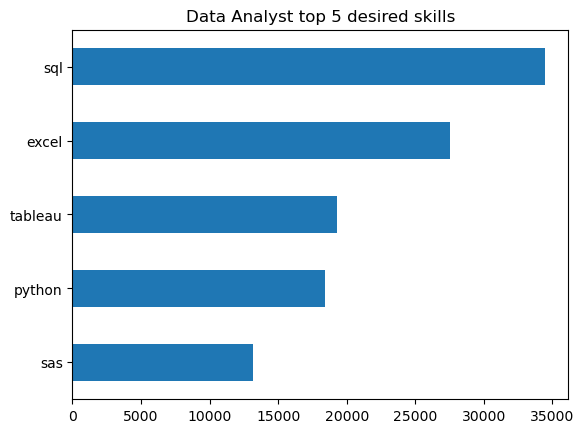

In [68]:
df_pivot.plot(kind= 'barh')
#reverse the order
plt.gca().invert_yaxis()
plt.title(f'{job_title_short} top {number_of_skills} desired skills')
plt.ylabel('')
plt.legend().set_visible(False)
#this always has to go last
plt.show()